In [1]:
import os
import fiona
import numpy as np
import pprint
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import geopandas as gpd
import pandas as pd
import json
import pyproj
from shapely import geometry
from shapely.geometry import Point, LineString, Polygon
from shapely import wkt
from shapely.ops import transform

# Tworzenie obiektów wektorowych za pomocą biblioteki shapely

In [2]:
punkt1=(204376,627861) #współrzędne pojedynczego punktu w układzie współrzędnych 1992 EPSG:2180
punkt2=(14.54771042, 53.43268351) #współrzędne pojedynczego punktu w układzie współrzędnych wgs84 EPSG:4326 (GPS)
punkt3=(1,1) #współrzędna kartezjańska np. współrzędne piksela

In [3]:
print(punkt2)

(14.54771042, 53.43268351)


# Generowanie geometrii WKT za pomocą shapely

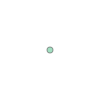

In [4]:
punkt=Point(punkt1)
punkt

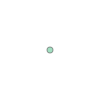

In [5]:
punkt3d = Point(14.54771042, 53.43268351, 14.7) #wysokość punktu 14.7
punkt3d

In [6]:
type(punkt1) #typ obiektu

tuple

In [7]:
type(punkt) #typ obiektu

shapely.geometry.point.Point

In [8]:
list(punkt.coords) #wyświetlenie coordynatów punktu

[(204376.0, 627861.0)]

In [9]:
punkt1=Point(204376,627861) #współrzędne pojedynczego punktu w układzie współrzędnych 1992 EPSG:2180
punkt2=Point(204396,627811)
punkt3=Point(14.54771042, 53.43268351)
print(round(punkt1.distance(punkt),2),'m')

#zwróć uwage, że dane muszą być w tym samym układzie współrzędnych

0.0 m


# Genrowanie linii

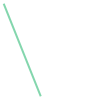

In [10]:
linia = LineString([punkt1, punkt2]) #n wierzchołków w postaci tablicy
linia

In [11]:
type(linia)

shapely.geometry.linestring.LineString

In [12]:
list(linia.coords)

[(204376.0, 627861.0), (204396.0, 627811.0)]

In [13]:
xcoords = list(linia.xy[0])
ycoords = list(linia.xy[1])
print(xcoords,ycoords) #możliwa iteracja

[204376.0, 204396.0] [627861.0, 627811.0]


In [14]:
print(round(linia.length,2),"m") #linia posiada długość jako atrybut geometrii

53.85 m


# Generowanie polygonu:

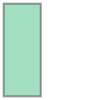

In [29]:
punkt1=[204376,627861] #współrzędne w postaci listy w układzie współrzędnych 1992 EPSG:2180
punkt2=[204396,627861]
punkt3=[204396,627811]
punkt4=[204376,627811]


Polygon([punkt1, punkt2,punkt3,punkt4])

In [30]:
type(punkt1)

list

In [32]:
punkt1=Point(204376,627861) #współrzędne punktu geometrii w układzie współrzędnych 1992 EPSG:2180
punkt2=Point(204396,627861)
punkt3=Point(204396,627811)
punkt4=Point(204376,627811)


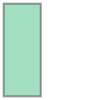

In [33]:
polygon = Polygon([[p.x, p.y] for p in [punkt1, punkt2, punkt3,punkt4]]) #tworzenie polygonu metodą iteracji
polygon

# Gotowa definicja WKT

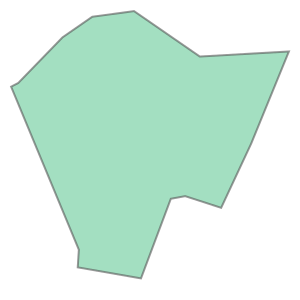

In [34]:
polygon1=wkt.loads('Polygon ((204525.05 626993.47, 204219.86 627046.75, 204225.19 627131.91, 203898.25 627918.83, 203932.8 627936.68, 204146.52 628156.93, 204289.82 628256.23, 204491.43 628283.51, 204809.01 628064.23, 205238.93 628088.68, 205056.98 627644.16, 204911.95 627334.07, 204738.38 627390.5, 204669.03 627377.73, 204525.05 626993.47))')
polygon2=wkt.loads('Polygon ((204371.52 628148.42, 204170.55 628003.35, 203981.56 627433.7, 204198.5 627171.5, 204760.16 627517.55, 204706.92 627988.71, 204371.52 628148.42))')
xxx=Polygon(shell=polygon1)
polygon1

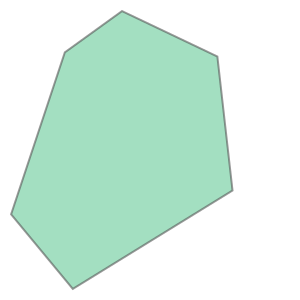

In [35]:
polygon2

# Operacje geometrii

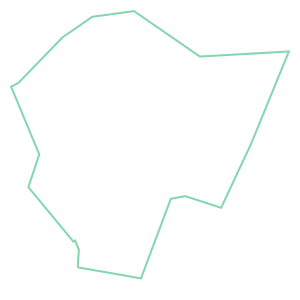

In [36]:
polygon1.union(polygon2).boundary #złączenie

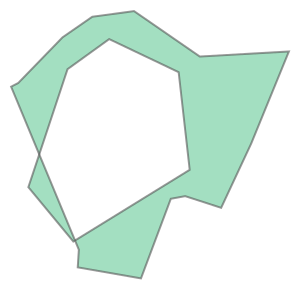

In [37]:
polygon1.symmetric_difference(polygon2) #różnica

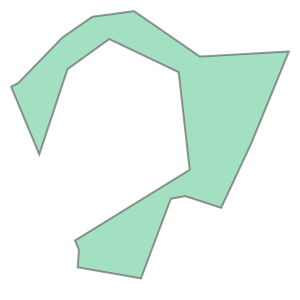

In [38]:
polygon1.difference(polygon2) #różnica

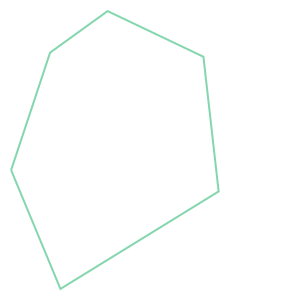

In [39]:
polygon1.intersection(polygon2).boundary #przecięcie

In [40]:
polygon1.overlaps(polygon2) #Zwraca True jeśli geometrie mają więcej niż jeden, ale nie wszystkie punkty wspólne

True

In [41]:
polygon1.touches(punkt1) #Zwraca True, jeśli obiekty mają przynajmniej jeden punkt wspólny, a ich wnętrza nie przecinają się z żadną częścią drugiego obiektu.

False

In [42]:
punkt1=wkt.loads('Point (204376.84 627862.61)')
punkt1.within(polygon1) #Zwraca True jeśli granica i wnętrze obiektu przecinają się tylko z wnętrzem drugiego obiektu

True

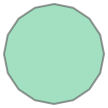

In [43]:
punkt1.buffer(50,resolution=4, cap_style=1, join_style=1, mitre_limit=5.0, single_sided=False)

# cap_style:
    1-koło
    2-płaski
    3-kwadrat

# join_style:
    1-okrogłe
    2-ukośnie
    3-skośnie

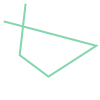

In [44]:
linia=wkt.loads('LineString (-0.67603306 0.78842975, -0.78181818 -0.13553719, -0.2661157 -0.52066116, 0.59338843 0.03305785, -1.06942149 0.47107438)')
linia

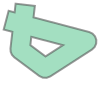

In [45]:
bufor=linia.buffer(0.2,resolution=4, cap_style=2, join_style=1)
bufor

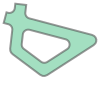

In [46]:
bufor2 = bufor.buffer(-0.1)
bufor2

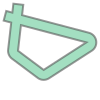

In [47]:
lewy = linia.buffer(-0.2, single_sided=True)
lewy

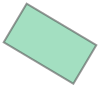

In [48]:
linia.minimum_rotated_rectangle #wpasowanie obiektu w prostokąt

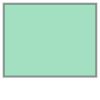

In [49]:
linia.envelope #Zwraca reprezentację punktu lub najmniejszego wielokąta prostokątnego (o bokach równoległych do osi współrzędnych), który zawiera obiekt.

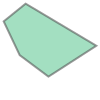

In [50]:
linia.convex_hull #Zwraca reprezentację najmniejszego wielokąta zawierającego wszystkie punkty w obiekcie, chyba że liczba punktów w obiekcie jest mniejsza niż trzy

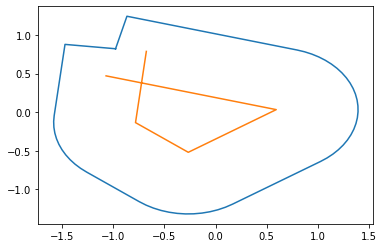

In [51]:
linia_source=wkt.loads('LineString (-0.67603306 0.78842975, -0.78181818 -0.13553719, -0.2661157 -0.52066116, 0.59338843 0.03305785, -1.06942149 0.47107438)')
linia_offset=linia_source.parallel_offset(0.8, resolution=16, join_style=1, mitre_limit=1) #oodsunięcie linii
x,y = linia_offset.xy
plt.plot(x,y)
x,y=linia_source.xy
plt.plot(x,y)


In [52]:
bufor=punkt1.buffer(100,resolution=100, cap_style=1, join_style=1, mitre_limit=5.0, single_sided=False)
bufor_simplify=bufor.simplify(20, preserve_topology=False)

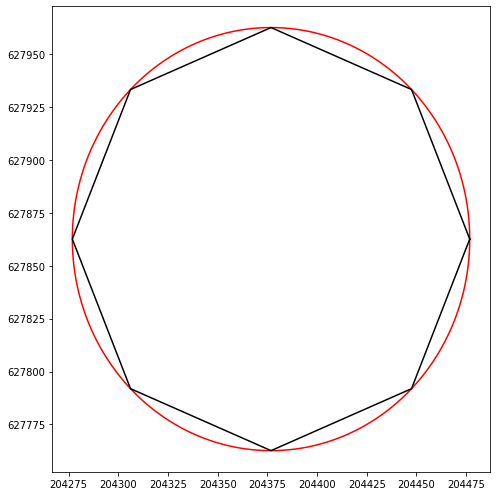

In [53]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
x, y = bufor.exterior.xy
plt.plot(x, y, c="red")
x, y = bufor_simplify.exterior.xy
plt.plot(x, y, c="black")
plt.show()

In [54]:
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt

df=pd.read_csv('budynki_multi.csv', sep='\t') 
results = []
for index, row in df.iterrows():
    #budynek=wkt.loads(row['wkt_geom'])
    print(row['wkt_geom'])
    results.append(wkt.loads(row['wkt_geom']))

MultiPolygon (((204435.33999999985098839 628091.05000000074505806, 204433.45000000018626451 628080.80000000074505806, 204431.87000000011175871 628081.06000000052154064, 204431.25 628077.74000000022351742, 204432.83000000007450581 628077.49000000022351742, 204432.54999999981373549 628076.01999999955296516, 204426.75999999977648258 628076.93999999947845936, 204427.01999999955296516 628078.55000000074505806, 204419.62000000011175871 628079.59999999962747097, 204419.07000000029802322 628085.35999999940395355, 204419.04999999981373549 628085.47000000067055225, 204418.13999999966472387 628092.16999999992549419, 204417.36000000033527613 628097.91999999992549419, 204427.59999999962747097 628099.21000000089406967, 204427.83999999985098839 628097.55000000074505806, 204433.70000000018626451 628091.33999999985098839, 204435.33999999985098839 628091.05000000074505806)))
MultiPolygon (((204562.58999999985098839 628208.99000000022351742, 204577.76999999955296516 628198.73000000044703484, 204570.32000

In [55]:
budynek=(results[3])
budynek.area


498.50694998853197

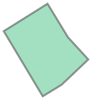

In [56]:
results[9]

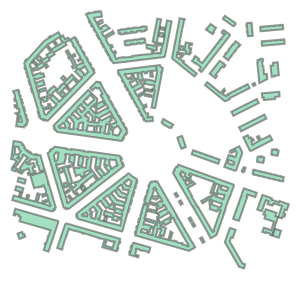

In [57]:
import shapely
polyout = shapely.ops.unary_union(results)
polyout

# Zmiana układu współrzędnych

In [58]:
punkt=Point(204376,627861)

project = pyproj.Transformer.from_proj(
    pyproj.Proj(init='epsg:2180'), # source coordinate system
    pyproj.Proj(init='epsg:4326')) # destination coordinate system
p2 = transform(project.transform, punkt) 

C:\users\48503\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\users\48503\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [59]:
list(p2.coords)

[(14.547710420628315, 53.43268350598892)]

In [60]:
punkt=Point(204376,627861)

wgs84 = pyproj.CRS('EPSG:4326')
pl = pyproj.CRS('EPSG:2180')

project = pyproj.Transformer.from_crs(pl, wgs84, always_xy=True).transform
p2 = transform(project, punkt)

In [61]:
list(p2.coords)

[(14.547710420628315, 53.43268350598892)]